# Vehicle Insurance Premium Pricing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename2='/content/drive/My Drive/datasets/Vehicle_Insurance_Claim_Records.csv'
df2= pd.read_csv(filename2)
df2.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,OCCUPATION,TRAVTIME,CAR_USE,CAR_VALUE,CAR_TYPE,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY
0,100130023,0,05-02-55,2,13,"26,763",Yes,"141,019",No,F,...,Manager,49,Private,"11,500",SUV,0,0,0,11,Highly Urban/ Urban
1,100263241,0,05-10-61,0,9,"156,060",No,"381,438",Yes,M,...,Blue Collar,29,Commercial,"25,230",Panel Truck,"8,207",1,0,9,Highly Urban/ Urban
2,100321982,0,12-11-59,1,11,"1,965",Yes,0,No,F,...,Home Maker,21,Private,"20,630",Minivan,0,0,0,11,Highly Urban/ Urban
3,100391818,0,11-10-61,1,10,"62,361",No,"185,738",Yes,F,...,Home Maker,32,Private,"11,540",SUV,"3,481",1,0,6,Highly Urban/ Urban
4,100549277,0,06-10-66,1,10,"34,192",Yes,0,No,F,...,Blue Collar,22,Commercial,"13,670",SUV,0,0,0,7,Highly Rural/ Rural


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          7647 non-null   int64 
 1   KIDSDRIV    7647 non-null   int64 
 2   BIRTH       7647 non-null   object
 3   HOMEKIDS    7647 non-null   int64 
 4   YOJ         7647 non-null   int64 
 5   INCOME      7647 non-null   object
 6   PARENT1     7647 non-null   object
 7   HOME_VAL    7647 non-null   object
 8   MSTATUS     7647 non-null   object
 9   GENDER      7647 non-null   object
 10  EDUCATION   7647 non-null   object
 11  OCCUPATION  7647 non-null   object
 12  TRAVTIME    7647 non-null   int64 
 13  CAR_USE     7647 non-null   object
 14  CAR_VALUE   7647 non-null   object
 15  CAR_TYPE    7647 non-null   object
 16  OLDCLAIM    7647 non-null   object
 17  CLM_FREQ    7647 non-null   int64 
 18  CLM_AMT     7647 non-null   object
 19  CAR_AGE     7647 non-null   int64 
 20  URBANICI

In [ ]:
df2.isnull().sum()

ID            0
KIDSDRIV      0
BIRTH         0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
CAR_VALUE     0
CAR_TYPE      0
OLDCLAIM      0
CLM_FREQ      0
CLM_AMT       0
CAR_AGE       0
URBANICITY    0
dtype: int64

In [ ]:
df2.shape

(7647, 21)

In [ ]:
gender = pd.get_dummies(df2.GENDER, drop_first = True)
mstatus = pd.get_dummies(df2.MSTATUS, drop_first = True)
education = pd.get_dummies(df2.EDUCATION, drop_first = True)
parent = pd.get_dummies(df2.PARENT1, drop_first = True)
occupation = pd.get_dummies(df2.OCCUPATION, drop_first = True)
car_use = pd.get_dummies(df2.CAR_USE, drop_first = True)
car_type = pd.get_dummies(df2.CAR_TYPE, drop_first = True)
urbanicity = pd.get_dummies(df2.URBANICITY, drop_first = True)

df2 = pd.concat([df2, gender, mstatus, education, parent, occupation, car_use, car_type, urbanicity], axis = 1)

df2.drop(['GENDER', 'MSTATUS', 'EDUCATION', 'PARENT1', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'URBANICITY' ], axis = 1, inplace = True)
df2

,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,...,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Urban/ Urban
0,100130023,0,05-02-55,2,13,"26,763","141,019",49,"11,500",0,...,1,0,0,1,0,0,1,0,0,1
1,100263241,0,05-10-61,0,9,"156,060","381,438",29,"25,230","8,207",...,0,0,0,0,1,0,0,0,0,1
2,100321982,0,12-11-59,1,11,"1,965",0,21,"20,630",0,...,0,0,0,1,0,0,0,0,0,1
3,100391818,0,11-10-61,1,10,"62,361","185,738",32,"11,540","3,481",...,0,0,0,1,0,0,1,0,0,1
4,100549277,0,06-10-66,1,10,"34,192",0,22,"13,670",0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,999532945,0,28-08-38,0,11,"67,813","249,997",51,"21,190",0,...,0,1,0,1,0,0,0,1,0,0
7643,999575184,0,24-12-68,2,11,"13,490","95,447",5,"5,850","31,401",...,0,0,1,0,0,1,0,0,0,1
7644,999612102,0,27-03-57,1,11,"44,955","161,808",30,"18,790",0,...,0,1,0,1,0,0,0,0,0,1
7645,999756883,0,09-06-51,0,13,"36,835","167,142",20,"17,360","32,434",...,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


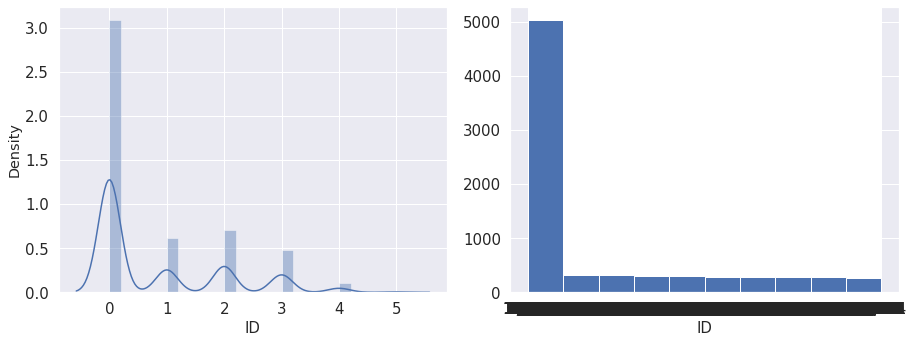

In [ ]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df2['CLM_FREQ'],ax=ax2)
ax2.set_xlabel('ID', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['OLDCLAIM'])
ax3.set_xlabel('ID', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

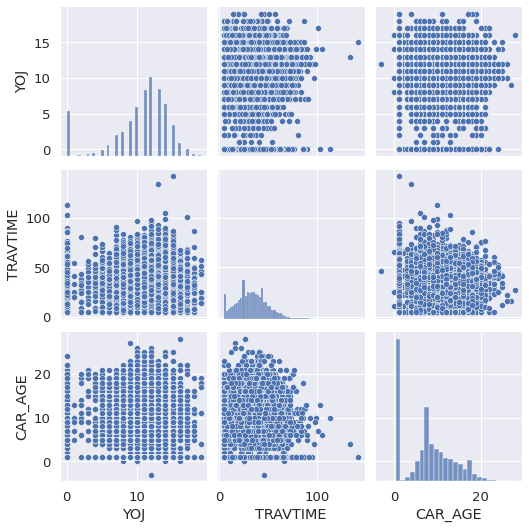

In [ ]:
sns.pairplot(df2[['YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'CAR_VALUE', 'CAR_AGE']])

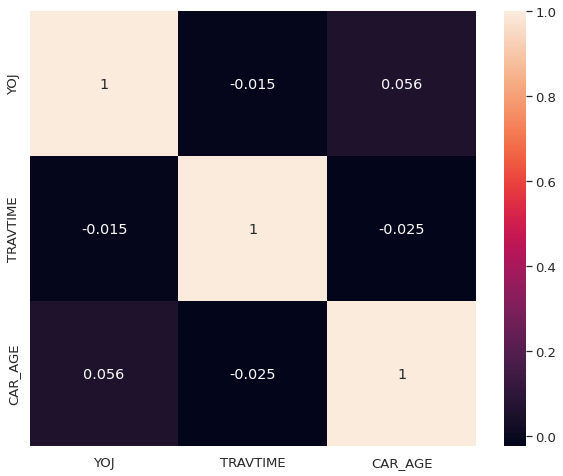

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2[['YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'CAR_VALUE', 'CAR_AGE']].corr(), annot=True)

In [ ]:
df2 = df2.drop(['BIRTH'], axis =1)
df2

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,CLM_FREQ,...,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Urban/ Urban
0,100130023,0,2,13,"26,763","141,019",49,"11,500",0,0,...,1,0,0,1,0,0,1,0,0,1
1,100263241,0,0,9,"156,060","381,438",29,"25,230","8,207",1,...,0,0,0,0,1,0,0,0,0,1
2,100321982,0,1,11,"1,965",0,21,"20,630",0,0,...,0,0,0,1,0,0,0,0,0,1
3,100391818,0,1,10,"62,361","185,738",32,"11,540","3,481",1,...,0,0,0,1,0,0,1,0,0,1
4,100549277,0,1,10,"34,192",0,22,"13,670",0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,999532945,0,0,11,"67,813","249,997",51,"21,190",0,0,...,0,1,0,1,0,0,0,1,0,0
7643,999575184,0,2,11,"13,490","95,447",5,"5,850","31,401",3,...,0,0,1,0,0,1,0,0,0,1
7644,999612102,0,1,11,"44,955","161,808",30,"18,790",0,0,...,0,1,0,1,0,0,0,0,0,1
7645,999756883,0,0,13,"36,835","167,142",20,"17,360","32,434",2,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2 = df2.replace(',', '', regex=True).astype(int)
df2

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,CLM_FREQ,...,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Urban/ Urban
0,100130023,0,2,13,26763,141019,49,11500,0,0,...,1,0,0,1,0,0,1,0,0,1
1,100263241,0,0,9,156060,381438,29,25230,8207,1,...,0,0,0,0,1,0,0,0,0,1
2,100321982,0,1,11,1965,0,21,20630,0,0,...,0,0,0,1,0,0,0,0,0,1
3,100391818,0,1,10,62361,185738,32,11540,3481,1,...,0,0,0,1,0,0,1,0,0,1
4,100549277,0,1,10,34192,0,22,13670,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,999532945,0,0,11,67813,249997,51,21190,0,0,...,0,1,0,1,0,0,0,1,0,0
7643,999575184,0,2,11,13490,95447,5,5850,31401,3,...,0,0,1,0,0,1,0,0,0,1
7644,999612102,0,1,11,44955,161808,30,18790,0,0,...,0,1,0,1,0,0,0,0,0,1
7645,999756883,0,0,13,36835,167142,20,17360,32434,2,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X1 = df2.drop(['Highly Urban/ Urban'], axis = 1)
y1 = df2.pop("Highly Urban/ Urban")
X1.head()

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,CLM_FREQ,...,Lawyer,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van
0,100130023,0,2,13,26763,141019,49,11500,0,0,...,0,1,0,0,1,0,0,1,0,0
1,100263241,0,0,9,156060,381438,29,25230,8207,1,...,0,0,0,0,0,1,0,0,0,0
2,100321982,0,1,11,1965,0,21,20630,0,0,...,0,0,0,0,1,0,0,0,0,0
3,100391818,0,1,10,62361,185738,32,11540,3481,1,...,0,0,0,0,1,0,0,1,0,0
4,100549277,0,1,10,34192,0,22,13670,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=5)

In [ ]:
print('X1_train',X1_train.shape)
print('X1_test',X1_test.shape)
print('y1_train',y1_train.shape)
print('y1_test',y1_test.shape)

X1_train (5352, 32)
X1_test (2295, 32)
y1_train (5352,)
y1_test (2295,)


In [ ]:
model1 = tree.DecisionTreeClassifier()
model1.fit(X1_train, y1_train) 

DecisionTreeClassifier()

In [ ]:
model1.predict(X1_test)

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
model1.score(X1_test, y1_test)

0.7660130718954249

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X1_train,y1_train)
lr_clf.score(X1_test,y1_test)

0.17769342039835923

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeClassifier(), X1, y1, cv=cv)

array([0.78954248, 0.7875817 , 0.77124183, 0.78954248, 0.7751634 ])

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier(), X1, y1, cv=cv)

array([0.83529412, 0.84052288, 0.84248366, 0.8254902 , 0.83137255])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision tree' : {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':['gini', 'entropy'],
                'splitter':['best', 'random']
            }
        },
        'random forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ["gini", "entropy"]
            }
        },

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X1,y1)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X1,y1)

,model,best_score,best_params
0,decision tree,0.776209,"{'criterion': 'entropy', 'splitter': 'best'}"
1,random forest,0.836340,{'criterion': 'gini'}
